XII Summer School in Statistics and Operation Research, July 1-5, 2018.   
Universitat Politècnica de Catalunya, Barcelona, Spain.


# Tutorial (Day-3): From Gaussian Graphical Models to Pearson and Partial Correlation estimation
#### Adrià Tauste Campo, Ph.D.



The aim of this section is to get famialiarized with Gaussian Graphical models as the natural framework where to define ans estimate Pearson and Partial correlation measures for connectivity studies.

This block in structured in the following parts:

1) Markov graphs and their properties (Board)

2) Gaussian Graphical models: How to generate and estimate conditional dependent/independent samples (Notebook)

3) Pearson and Partial correlation measures: Estimation and significance testing (Notebook)


Reference:
Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction, Springer Series in Statistics

### Import the main libraries

To get started, the first thing we need is to load the libraries we will need to work.

In [3]:
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_spd_matrix
import matplotlib.pyplot as pp
save_figs=1
%matplotlib inline


## Gaussian Graphical models: How to generate and estimate conditional dependent/independent samples

### a) Setting initial covariance and precision matrices (bivariate model)
We first set the theoretical covariance and precision matrices of the initial network.

Theoretical covariance matrix
[[1.  0.8]
 [0.8 1. ]]
Theoretical precision matrix
[[ 2.77777778 -2.22222222]
 [-2.22222222  2.77777778]]


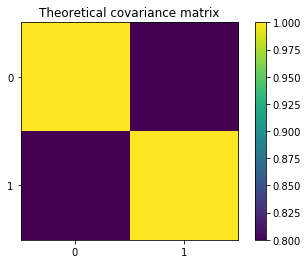

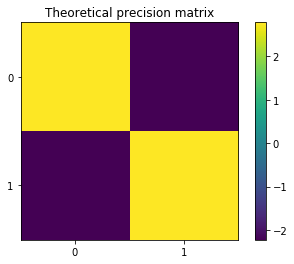

Eigenvalues check
[1.8 0.2]


In [9]:

#Start with a basic graph of 3 nodes
number_nodes=2

#Setting parameters
#mean
mean = np.array([0,0])
#mean = np.reshape(mean, (1,2))
#covariance matrix 
cov=np.zeros((2,2))
cov[0,0]=1
cov[0,1]=0.8
cov[1,0]=0.8
cov[1,1]=1


inv_cov=LA.pinv(cov)

#printing covariance matrix
print ("Theoretical covariance matrix")
print(np.matrix(cov))
print ("Theoretical precision matrix")
print(np.matrix(inv_cov))



pp.figure()
pp.title('Theoretical covariance matrix')
pp.imshow(cov,interpolation='nearest',origin='upper')
pp.xticks([0,1], ['0', '1'])
pp.yticks([0,1], ['0', '1'])
pp.colorbar()
if save_figs:
   pp.savefig('orig_prec') 
pp.show()

pp.figure()
pp.title('Theoretical precision matrix')
pp.imshow(inv_cov,interpolation='nearest',origin='upper')
pp.xticks([0,1], ['0', '1'])
pp.yticks([0,1], ['0', '1'])
pp.colorbar()
if save_figs:
   pp.savefig('orig_prec') 
pp.show()

    
#checking postive definitness propoerty of covariance
l, v = LA.eig(cov)
#print eigenvalues
print ("Eigenvalues check")
print(l)


### b) Connecting a 3rd node to the Network
We consider the  parameters of an additional node to be connected to the existing network: (local) mean, (local) variance and connectivity weights. 

Parameters of the 3rd node: 

Mean is 0.00e+00
Variance 2.00e+00
Connectivity weights are
[[0. 1.]]


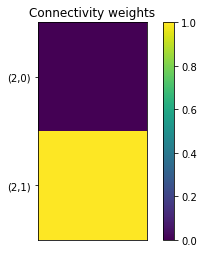

In [10]:
print("Parameters of the 3rd node: \n")

#1-Mean and Variance
mean_node = np.array([0])
sigma_node=2
print("Mean is %1.2e" %(mean_node))
print("Variance %1.2e" %(sigma_node))
#mean_node=np.reshape(mean_node, (1,1))
sigma_node=np.reshape(sigma_node, (1,1))

#2-Connectivity weights
Beta=np.array([0., 1.])
Beta=np.reshape(Beta, (2,1))
print("Connectivity weights are")
print(Beta.T)

pp.figure()
pp.title('Connectivity weights')
pp.imshow(Beta)
pp.xticks([], [])
pp.yticks([0,1], ['(2,0)', '(2,1)'])
pp.colorbar() 
pp.show()




### Is the new model still Gaussian?
Check whether the 3 nodes still form a Gaussian model (of dimension 3).

In [11]:
#Updating model

#updating the mean
mean_updated=np.concatenate(([mean, mean_node]))


#Computation of covariance factor of node 3
cov_zy=np.dot(cov,Beta)
cov_zy=np.reshape(cov_zy,(2,1))
  
#Updating the covariance matrix
conc1=np.concatenate((cov, cov_zy),axis=1)
conc2=np.concatenate((cov_zy.T, sigma_node),axis=1)
cov_updated=np.concatenate((conc1,conc2), axis=0)


#Checking positive definitness propoerty of covariance
l, v = LA.eig(cov_updated)
#print eigenvalues
print ("Eigenvalues")
print(l)

print("Is the new model still Gaussian")

if np.all(l > 0): 
    print("Yes")
else: 
    print("No")

Eigenvalues
[3.18033705 0.64385346 0.17580949]
Is the new model still Gaussian
Yes


### Update model

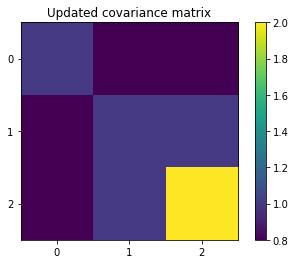

[[1.  0.8 0.8]
 [0.8 1.  1. ]
 [0.8 1.  2. ]]


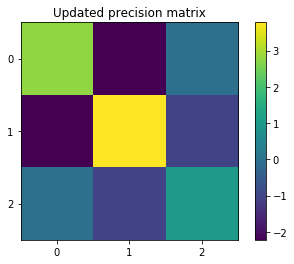

[[ 2.77777778 -2.22222222  0.        ]
 [-2.22222222  3.77777778 -1.        ]
 [ 0.         -1.          1.        ]]


In [12]:


#Updating the covariance matrix

pp.figure()
pp.title('Updated covariance matrix')
pp.imshow(cov_updated,interpolation='nearest',origin='upper')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar() 
pp.show()
print(np.matrix(cov_updated))

#Updating the precision matrix
## Computing the precision matrix
inv_cov_updated=LA.inv(cov_updated)

pp.figure()
pp.title('Updated precision matrix')
pp.imshow(inv_cov_updated,interpolation='nearest',origin='upper')
pp.xticks([0,1,2], ['0', '1', '2'])
pp.yticks([0,1,2], ['0', '1', '2'])
pp.colorbar()
pp.show()
print(inv_cov_updated)

### c) Connecting a 4th node to the network
We consider the  parameters of an additional node to be connected to the existing network: (local) mean, (local) variance and connectivity weights. 

Mean is 0.00e+00
Variance 5.00e+00
Connectivity weights are
[[1. 0. 1.]]


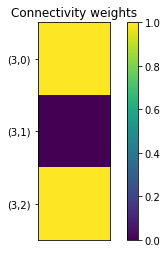

In [13]:

#1-Mean and Variance
mean_node_2=np.array([0])
#sigma_node_2=2.5
sigma_node_2=5
print("Mean is %1.2e" %(mean_node_2))
print("Variance %1.2e" %(sigma_node_2))
#mean_node_2=np.reshape(mean_node_2, (1,1))
sigma_node_2=np.reshape(sigma_node_2, (1,1))

#2-Connectivity weights
Beta_2=np.array([1.,0., 1.])
Beta_2=np.reshape(Beta_2, (3,1))
print("Connectivity weights are")
print(Beta_2.T)

pp.figure()
pp.title('Connectivity weights')
pp.imshow(Beta_2)
pp.xticks([], [])
pp.yticks([0,1,2], ['(3,0)', '(3,1)', '(3,2)'])
pp.colorbar() 
pp.show()

### Is the new model still Gaussian?
Check whether the 4 nodes still form a Gaussian model (of dimension 4).

In [14]:
### Is the new model still Gaussian?
#Updating model
#updating the mean
mean_updated_2=np.concatenate(([mean_updated, mean_node_2]))


#Computation of covariance factor of node 3
cov_zy_2=np.dot(cov_updated,Beta_2)
cov_zy_2=np.reshape(cov_zy_2,(3,1))
  
#Updating the covariance matrix
conc1=np.concatenate((cov_updated, cov_zy_2),axis=1)
conc2=np.concatenate((cov_zy_2.T, sigma_node_2),axis=1)
cov_updated_2=np.concatenate((conc1,conc2), axis=0)


#Checking positive definitness propoerty of covariance
l, v = LA.eig(cov_updated_2)
#print eigenvalues
print ("Eigenvalues")
print(l)

print("Is the new model still Gaussian?")

if np.all(l > 0): 
    print("Yes")
else: 
    print("No")

Eigenvalues
[7.98128924 0.64385548 0.10312463 0.27173065]
Is the new model still Gaussian?
Yes


### Update model

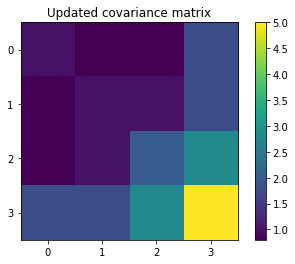

[[1.  0.8 0.8 1.8]
 [0.8 1.  1.  1.8]
 [0.8 1.  2.  2.8]
 [1.8 1.8 2.8 5. ]]


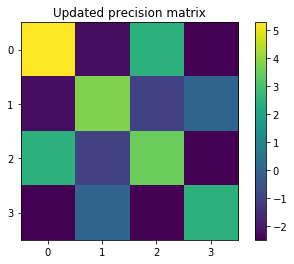

[[ 5.27777778e+00 -2.22222222e+00  2.50000000e+00 -2.50000000e+00]
 [-2.22222222e+00  3.77777778e+00 -1.00000000e+00 -6.16790569e-16]
 [ 2.50000000e+00 -1.00000000e+00  3.50000000e+00 -2.50000000e+00]
 [-2.50000000e+00 -6.29126381e-16 -2.50000000e+00  2.50000000e+00]]


In [15]:
#Updating the covariance matrix

pp.figure()
pp.title('Updated covariance matrix')
pp.imshow(cov_updated_2,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.colorbar() 
pp.show()
print(np.matrix(cov_updated_2))

#Updating the precision matrix
## Computing the precision matrix
inv_cov_updated_2=LA.inv(cov_updated_2)

pp.figure()
pp.title('Updated precision matrix')
pp.imshow(inv_cov_updated_2,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.colorbar()
pp.show()
print(inv_cov_updated_2)
    


### d) Simulation validation: Generation of conditional dependent/independent samples of the added node
We here simulate samples of the updated network to infer connectivity weights. We start by generating the conditional samples of the new added node and visualize the problem dimensionality.  

In [17]:

N = 20000 # number of samples
updated_number_nodes=number_nodes+2

#Generate 4-node Faussian model
X= np.random.multivariate_normal(mean_updated_2,cov_updated_2, N).T
X=np.reshape(X,(updated_number_nodes, N))

print("Dimensions of the network data (variable nodes x samples)")
print(X.shape)



Dimensions of the network data (variable nodes x samples)
(4, 20000)


### e) Simulation validation: Estimation of the covariance and precision matrices
Then, we estimate the whole covariance and precision matrices from the generated data observations

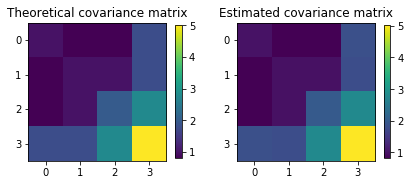

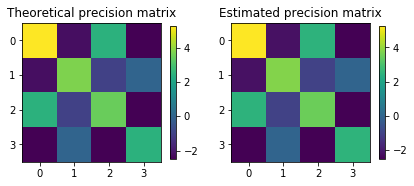

[[1.02364084 0.81147169 0.81583346 1.83664714]
 [0.81147169 0.99957988 1.0039513  1.81433103]
 [0.81583346 1.0039513  1.99703057 2.80354883]
 [1.83664714 1.81433103 2.80354883 5.02033446]]


Frobenius-norm error between original and estimated covariance matrix = 7.00e-02
[[ 5.26340498 -2.19332493  2.51287384 -2.5361985 ]
 [-2.19332493  3.82359123 -0.98481964 -0.02946144]
 [ 2.51287384 -0.98481964  3.51896437 -2.52852918]
 [-2.5361985  -0.02946144 -2.52852918  2.5497125 ]]


Frobenius-norm error between original and estimated precision matrix = 1.17e-01


In [18]:

#Estimate covariance and precision matrices
cov_updated_2_hat=np.cov(X)

#Covariance matrix
pp.figure()

pp.subplot(121)
pp.title('Theoretical covariance matrix')
pp.imshow(cov_updated_2,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.subplot(122)
pp.title('Estimated covariance matrix')
pp.imshow(cov_updated_2_hat,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.tight_layout()
pp.show()

pp.figure()
pp.subplot(121)
#Precision matrix
inv_cov_updated_2_hat=LA.pinv(cov_updated_2_hat)
#pp.figure()
pp.title('Theoretical precision matrix')
pp.imshow(inv_cov_updated_2,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)
pp.subplot(122)
pp.title('Estimated precision matrix')
pp.imshow(inv_cov_updated_2_hat,interpolation='nearest',origin='upper')
pp.colorbar(shrink=0.5)

pp.tight_layout()
pp.show()
print(np.matrix(cov_updated_2_hat))
print('\n')
print("Frobenius-norm error between original and estimated covariance matrix = %1.2e" %(LA.norm(cov_updated_2-cov_updated_2_hat)))

print(np.matrix(inv_cov_updated_2_hat))
print('\n')
print("Frobenius-norm error between original and estimated precision matrix = %1.2e" %(LA.norm(inv_cov_updated_2-inv_cov_updated_2_hat)))


# Pearson and Partial correlation: Estimation and significance testing 
We here compute the Pearson and Partial correlation estimates as a function of the covariance and precision matrices.

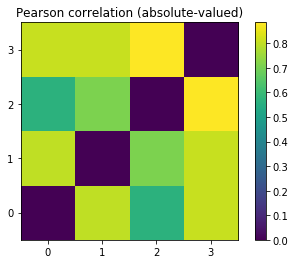

[[0.         0.80221508 0.57060471 0.81018762]
 [0.80221508 0.         0.71057764 0.80991874]
 [0.57060471 0.71057764 0.         0.88542023]
 [0.81018762 0.80991874 0.88542023 0.        ]]


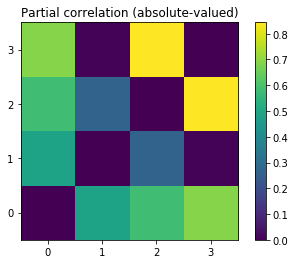

[[0.         0.48891555 0.58388841 0.6923158 ]
 [0.48891555 0.         0.26848099 0.00943567]
 [0.58388841 0.26848099 0.         0.84414087]
 [0.6923158  0.00943567 0.84414087 0.        ]]


In [19]:
   
mask_diag = np.eye(updated_number_nodes,dtype=np.bool) # mask for diagonal elements
    
# Pearson correlation
FC = np.array(cov_updated_2_hat)
FC /= np.sqrt(np.outer(FC.diagonal(),FC.diagonal()))
FC[mask_diag] = 0
        
# Partial correlation
PC = np.array(inv_cov_updated_2_hat)
PC /= -np.sqrt(np.outer(PC.diagonal(),PC.diagonal()))
PC[mask_diag] = 0
    
        
pp.figure()
pp.title('Pearson correlation (absolute-valued)')
pp.imshow(abs(FC),interpolation='nearest',origin='bottom')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 
print(np.matrix(abs(FC)))

pp.figure()
pp.title('Partial correlation (absolute-valued)')
pp.imshow(abs(PC),interpolation='nearest',origin='bottom')
pp.colorbar()
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 
print(np.matrix(abs(PC)))

Finally, we make use of significane testig to extract a binary decision on the existence of functional and structural weights in the network. 

Significance level
0.05
Multiple comparison significance threshold
0.008333333333333333


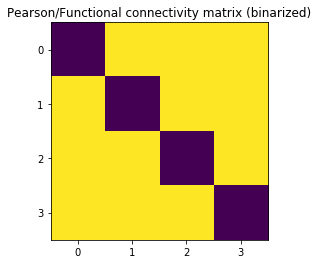

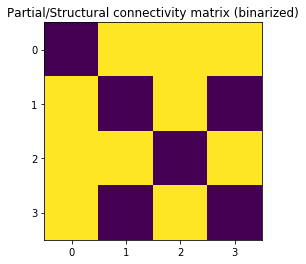

In [26]:
import numpy as np
from scipy import stats, linalg

def pearson_partial_corr_p_values(C):
    """
    Returns the p-values of Pearson/partial correlation using the statistic exact distribution 
    of the sample correlation coefficient
    
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the p-value of Pearson/Partial correlation of C[:, i] and C[:, j]"""

    
    C = np.asarray(C)
    p = C.shape[1]
    FC_pval = np.zeros((p, p), dtype=np.float)
    PC_pval = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        PC_pval[i, i] = 1
        FC_pval[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
 
            
            corr = stats.pearsonr(C[:, j], C[:, i])[1]
            corr = stats.pearsonr(C[:, i], C[:, j])[1]
            FC_pval[i, j] = corr
            FC_pval[j, i] = corr
            
            
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[1]
            corr = stats.pearsonr(res_i, res_j)[1]
            PC_pval[i, j] = corr
            PC_pval[j, i] = corr
        
    return FC_pval, PC_pval 

#Signifricance Levels
sign_th=0.05
number_comparisons=updated_number_nodes*(updated_number_nodes-1)/2
multiple_comparison_threshold=sign_th/number_comparisons
print("Significance level")
print(sign_th)
print("Multiple comparison significance threshold")
print(multiple_comparison_threshold)


#Significance testing
FC_pval, PC_pval=pearson_partial_corr_p_values(X.T)
FC_connectivity=FC_pval<multiple_comparison_threshold
PC_connectivity=PC_pval<multiple_comparison_threshold


pp.figure()
pp.title('Pearson/Functional connectivity matrix (binarized)')
pp.imshow(FC_connectivity,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])

pp.figure()
pp.title('Partial/Structural connectivity matrix (binarized)')
pp.imshow(PC_connectivity,interpolation='nearest',origin='upper')
pp.xticks([0,1,2,3], ['0', '1', '2', '3'])
pp.yticks([0,1,2,3], ['0', '1', '2', '3'])
pp.show() 



## Exercises

1- In the data set of your choice, take the whole ensamble of signals and sequentially extract a different node keeping track of the overall change in the partial correlation (e.g., by performing a mean of the partial correlation coefficients before and after the extraction). Which is the extracted node that causes a larger change in the mean partial correlation? Provide an interpretation of your findings.

2- In the data set where the structural connectivity is provided, for every subject estimate partial and pearson correlation with significance levels in different temporal windows and experimental runs and compare the difference (in Frobenius norm) between the structural matreix and your Partial/Pearson correlation estimations. Provide an interpretation of your findings.